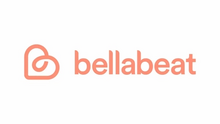
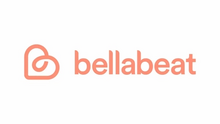
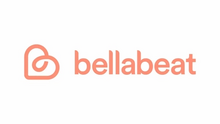
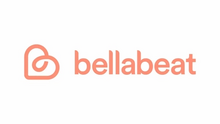

# Estudo de Caso Bellabeat – Análise de Dados
## **Introdução**

A **Bellabeat**, fundada por *Urška Sršen* e *Sando Mur*, é uma empresa de tecnologia voltada à criação de produtos inteligentes focados na saúde e bem-estar das mulheres. Com um design diferenciado e coleta de dados sobre atividade física, sono, estresse e saúde reprodutiva, os dispositivos da Bellabeat ajudam as usuárias a monitorar seus hábitos de vida.



A fundadora acredita que uma análise detalhada dos dados de uso dos dispositivos pode revelar oportunidades estratégicas para o crescimento da empresa. Por isso, solicitou à equipe de marketing uma análise voltada ao comportamento dos usuários, com o objetivo de embasar futuras ações de marketing.

---

## Objetivo

Usar dados para orientar decisões de marketing mais inteligentes e apoiar o crescimento contínuo da Bellabeat no mercado de tecnologia voltada para o bem-estar das mulheres.

## Roteiro do Estudo de Caso

Neste estudo de caso, seguiremos as etapas do processo de análise de dados — **perguntar, preparar, processar, analisar, compartilhar e agir** — como um roteiro para fornecer recomendações com base em dados de tendências de consumo.

---


# **Etapa 1 - Ask**


A **Bellabeat** deseja expandir sua presença no mercado global de dispositivos inteligentes e, para isso, busca entender melhor como os consumidores utilizam tecnologias de bem-estar.

O time de **análise de marketing** foi encarregado de analisar dados de uso de dispositivos inteligentes por **usuários que não são clientes da Bellabeat**, com o objetivo de identificar padrões de:

- Comportamento do usuário  
- Monitoramento de saúde  
- Engajamento com os dispositivos

### Com base nesses insights, será necessário:

Aplicar os aprendizados a **um produto da Bellabeat** (App, Leaf, Time, Spring ou Membership), criando recomendações de marketing que ajudem a:

- Melhorar o engajamento do cliente  
- Aumentar a adoção do produto  
- Apoiar estratégias futuras da empresa

---

#### Stakeholders (Partes Interessadas)

- **Urška Sršen**: Cofundadora e Diretora Criativa da Bellabeat  
- **Sando Mur**: Cofundador e matemático da Bellabeat, membro importante da equipe executiva  
- **Time de Análise de Marketing**: Responsável por coletar, analisar e apresentar dados para orientar a estratégia de marketing da empresa


---




#  **Etapa 2 - Prepare**

### Dados Utilizados
A fonte de dados usada para este estudo de caso é o **FitBit Fitness Tracker Data**. Esse conjunto de dados foi baixado do **Kaggle**, onde foi carregado por **Möbius**.

---

### Acessibilidade e Uso dos Dados
O conjunto de dados foi publicado por Möbius no **Kaggle.com** sob a licença **CC0: Public Domain Creative Common License**, o que dispensa todos os direitos sobre a obra e permite que o conjunto de dados seja copiado, modificado, distribuído e executado sem a necessidade de permissão.

---

### Resumo dos Dados
De acordo com o conjunto de dados no **Zenodo.org**, ele foi gerado por **30 usuários do Fitbit** que responderam a uma pesquisa via **Amazon Mechanical Turk** entre **03-12-2016 a 05-12-2016**, com consentimento para o envio de dados de atividade física, batimentos cardíacos e monitoramento de sono.

A variação nos dados reflete o uso de diferentes modelos de rastreadores Fitbit e preferências individuais de monitoramento.

---

### Organização dos Dados
Dezoito conjuntos de dados foram baixados do **FitBit Fitness Tracker Data**. Os dados foram salvos no formato **.csv** e incluíam formatos **longo** e **largo**. Os dados escolhidos para análise incluem um número de **33 participantes** durante um período de **31 dias**.

---

### Limitações dos Dados e Integridade

O **FitBit Fitness Tracker Data** foi coletado em **2016**, tornando os dados desatualizados para análise de tendências atuais. A coleta ocorreu apenas durante **31 dias** (de **04-12-2016 a 05-12-2016**), limitando a representatividade da análise.

A amostra de **33 participantes** pode introduzir viés, e uma amostra maior aumentaria a confiabilidade. A falta de informações demográficas também dificulta a avaliação da representatividade da amostra, limitando as recomendações para o público-alvo, especialmente mulheres e pessoas que menstruam.

---


# **Etapa 3 - Process**

Para a análise do estudo de caso, os seguintes conjuntos de dados foram escolhidos:

- Daily_Activity_Merged
- Hourly_Steps_Merged

Todos os dados foram processados e tratados utilizando Python com a biblioteca Pandas.

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura de arquivos CSV 
daily_activity = pd.read_csv(r"/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_steps = pd.read_csv(r"/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

**Explorando os DataFrames**

In [3]:
# Lista de Dataframes
dfs = {
    'daily_activity': daily_activity,
    'hourly_steps': hourly_steps,
}

# Lista das colunas dos Dataframes
list(daily_activity.columns)

['Id',
 'ActivityDate',
 'TotalSteps',
 'TotalDistance',
 'TrackerDistance',
 'LoggedActivitiesDistance',
 'VeryActiveDistance',
 'ModeratelyActiveDistance',
 'LightActiveDistance',
 'SedentaryActiveDistance',
 'VeryActiveMinutes',
 'FairlyActiveMinutes',
 'LightlyActiveMinutes',
 'SedentaryMinutes',
 'Calories']

In [4]:
# Lista das colunas dos Dataframes
list(hourly_steps.columns)

['Id', 'ActivityHour', 'StepTotal']

In [5]:
#Padronização de nomes de colunas (snake_case)
daily_activity.columns = [
    'id',
    'activity_date',
    'total_steps',
    'total_distance',
    'tracker_distance',
    'logged_activities_distance',
    'very_active_distance',
    'moderately_active_distance',
    'light_active_distance',
    'sedentary_active_distance',
    'very_active_minutes',
    'fairly_active_minutes',
    'lightly_active_minutes',
    'sedentary_minutes',
    'calories'
]

In [6]:
#Padronização de nomes de colunas (snake_case)
hourly_steps.columns = [
    'id', 'activity_hour', 'step_total'
]

In [7]:
#Ajuste da coluna de data para o formato datetime
daily_activity['activity_date'] = pd.to_datetime(daily_activity['activity_date'], errors='raise')
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          940 non-null    int64         
 1   activity_date               940 non-null    datetime64[ns]
 2   total_steps                 940 non-null    int64         
 3   total_distance              940 non-null    float64       
 4   tracker_distance            940 non-null    float64       
 5   logged_activities_distance  940 non-null    float64       
 6   very_active_distance        940 non-null    float64       
 7   moderately_active_distance  940 non-null    float64       
 8   light_active_distance       940 non-null    float64       
 9   sedentary_active_distance   940 non-null    float64       
 10  very_active_minutes         940 non-null    int64         
 11  fairly_active_minutes       940 non-null    int64         

In [8]:
#Ajuste da coluna de data para o formato datetime
hourly_steps['activity_hour'] = pd.to_datetime(hourly_steps['activity_hour'], errors='raise')
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             22099 non-null  int64         
 1   activity_hour  22099 non-null  datetime64[ns]
 2   step_total     22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [9]:
#Verifica o tempo que a análise vai ser aplicada
first_date = daily_activity['activity_date'].min()
print("Primeira Data", first_date)
last_date = daily_activity['activity_date'].max()
print("Última Data", last_date)

Primeira Data 2016-04-12 00:00:00
Última Data 2016-05-12 00:00:00


In [10]:
# Loop para verificar duplicatas
for name, df in dfs.items():
    duplicatas = df.duplicated().sum()
    print(f"{name}: {duplicatas} duplicatas")
# Loop para verificar se existem valores nulos
for name, df in dfs.items():
    nulos = df.isnull().values.sum()
    print(f"{name}: {nulos} nulos")

daily_activity: 0 duplicatas
hourly_steps: 0 duplicatas
daily_activity: 0 nulos
hourly_steps: 0 nulos


In [11]:
#Renomear colunas
daily_activity.rename(columns={'activity_date': 'date'}, inplace=True)
daily_activity.head(5)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [12]:
hourly_steps.head(5)

,id,activity_hour,step_total
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [13]:
# Separar data e hora da coluna activity_hour
hourly_steps['date'] = hourly_steps['activity_hour'].dt.date
hourly_steps['time'] = hourly_steps['activity_hour'].dt.hour
hourly_steps.head(5)

,id,activity_hour,step_total,date,time
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,0
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,1
2,1503960366,2016-04-12 02:00:00,151,2016-04-12,2
3,1503960366,2016-04-12 03:00:00,0,2016-04-12,3
4,1503960366,2016-04-12 04:00:00,0,2016-04-12,4


In [14]:
#Verificando a quantidade de usuários(ID)
daily_activity.id.nunique()

33

**Com isso temos que o estudo foi feito com apenas 33 usuários**

In [15]:
#Criando uma coluna com o nome do dia da semana
daily_activity["day_name"] = daily_activity["date"].dt.day_name()
print(daily_activity["day_name"].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: day_name, dtype: object



---

# **Etapa 4 - Analyse & Share**

In [16]:
# Contar quantas vezes cada ID aparece (quantidade de logins por usuário)
contagem_ids = daily_activity['id'].value_counts()
agrupado = contagem_ids.value_counts().sort_index()
agrupado.name = 'numero_de_usuarios'
tabela = agrupado.reset_index()
tabela.columns = ['quantidade_de_logins', 'numero_de_usuarios']
print(tabela)



   quantidade_de_logins  numero_de_usuarios
0                     4                   1
1                    18                   1
2                    19                   1
3                    20                   1
4                    26                   2
5                    28                   1
6                    29                   2
7                    30                   3
8                    31                  21


#### **Pode-se notar que 63,6% (21 de 33) dos usuários apresentaram acesso contínuo ao aplicativo ao longo de todo o período analisado.**

Em seguida, foi realizada uma classificação dos usuários com base na frequência de uso do FitBit Fitness Tracker. Foram definidos três tipos de usuários:

- **Usuário Ativo**: usou o rastreador por 26 a 31 dias

- **Usuário Moderado**: usou o rastreador por 15 a 24 dias

- **Usuário Leve**: usou o rastreador por 0 a 14 dias

                   quantidade  porcentagem
fitbit_usage_type                         
Light User                  1         3.03
Moderate User               5        15.15
Active User                27        81.82


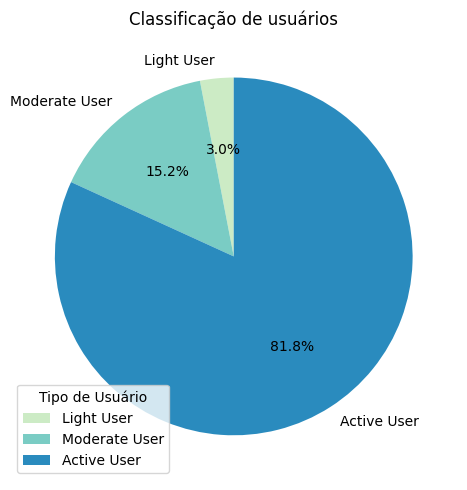

In [17]:
#Classificação de usuário
df_uso = daily_activity.groupby('id').size().reset_index(name='total_logged_uses')
df_uso['fitbit_usage_type'] = pd.cut(
    df_uso['total_logged_uses'],
    bins=[0, 14, 26, 31],
    labels=['Light User', 'Moderate User', 'Active User']
)

contagem = df_uso['fitbit_usage_type'].value_counts().sort_index()

porcentagem = (contagem / contagem.sum()) * 100
resumo = pd.DataFrame({
    'quantidade': contagem,
    'porcentagem': porcentagem.round(2)
})
print(resumo)

# Cria o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(
    resumo['porcentagem'], 
    labels=resumo.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('GnBu', len(resumo)),  
    startangle=90,  
)

plt.legend(
    labels=resumo.index, 
    title="Tipo de Usuário", 
    loc="lower left",  
    fontsize=10  
)
plt.title('Classificação de usuários')
plt.tight_layout()
plt.show()

A maioria dos usuários do Fitbit (**81,82%**) foi classificada como **Active User**, indicando um alto nível de engajamento com o dispositivo. Apenas **15,15%** foram **Moderate Users** e **3,03%** foram **Light Users**, o que mostrou um uso mais esporádico. Esses dados revelaram que a maior parte dos usuários logaram no Fitbit de forma frequente e consistente.


day_name
Monday       120
Tuesday      152
Wednesday    150
Thursday     147
Friday       126
Saturday     124
Sunday       121
Name: id, dtype: int64


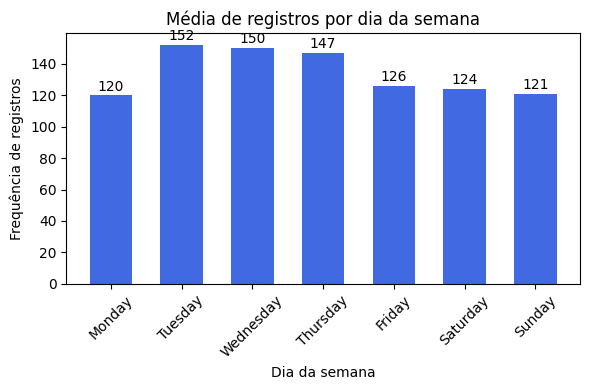

In [18]:
#Frequência de registros de usuários por dia da semana
frequencia_dias = daily_activity.groupby('day_name')['id'].count().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print(frequencia_dias)

plt.figure(figsize=(6,4))
bars = plt.bar(frequencia_dias.index, frequencia_dias.values, color='royalblue', width=0.6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.title("Média de registros por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Frequência de registros")
plt.tight_layout()
plt.show()

### Frequência de Uso ao Longo da Semana

Neste histograma, analisamos a frequência de uso do aplicativo **FitBit** com base nos dias da semana.

Os dados revelam que os usuários tendem a ser **mais ativos entre terça e quinta-feira**. Esse padrão indica que a metade da semana é o momento em que eles mais lembram — ou escolhem — registrar suas atividades no aplicativo.

No entanto, há uma **queda de uso nas sextas-feiras**, que se mantém **baixa durante o fim de semana e também nas segundas-feiras**.

**Insight Estratégico**:  
Com base nesse comportamento, segunda e sexta-feira podem ser excelentes oportunidades para enviar **mensagens motivacionais e de incentivo**, promovendo um **fluxo contínuo de engajamento** ao longo da semana.


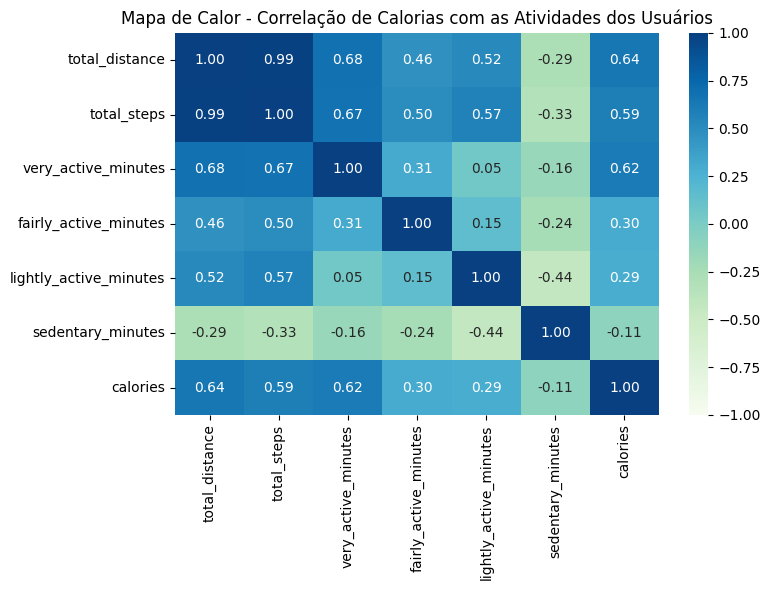

In [19]:
#Correlação entre calorias com as atividades dos usuários
selected_columns = ['total_distance', 'total_steps', 'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes', 'calories']

corr_matrix = daily_activity[selected_columns].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='GnBu', fmt='.2f', vmin=-1, vmax=1)

plt.title('Mapa de Calor - Correlação de Calorias com as Atividades dos Usuários')
plt.tight_layout()
plt.show()

#### Correlação entre Atividades e Gasto Calórico

Os dados revelam que a **distância total percorrida ao longo do dia** é o melhor indicador de gasto calórico, seguida pelo **tempo em atividades intensas** e pelo **número total de passos**:

- **TotalDistance (0.64)**: Forte correlação positiva — quanto maior a distância percorrida, mais calorias são queimadas.
- **VeryActiveMinutes (0.62)**: Também apresenta uma forte correlação — períodos de atividade intensa têm impacto direto no gasto calórico.
- **TotalSteps (0.59)**: Boa correlação positiva — mais passos ao longo do dia tendem a resultar em maior queima de calorias.

Atividades de intensidade moderada ou leve também contribuem, mas com menor impacto:

- **FairlyActiveMinutes (0.30)**: Correlação positiva moderada — atividades moderadas têm alguma influência no gasto calórico.
- **LightlyActiveMinutes (0.29)**: Correlação positiva fraca a moderada — atividades leves contribuem, mas com menos intensidade.

Por fim, o comportamento sedentário mostra uma leve relação inversa:

- **SedentaryMinutes (-0.11)**: Correlação negativa fraca — quanto mais tempo sedentário, levemente menor é o gasto calórico.

Esses resultados indicam que, embora todos os tipos de atividade física contribuam para o gasto calórico, a **intensidade** e a **distância percorrida** são os fatores mais determinantes.


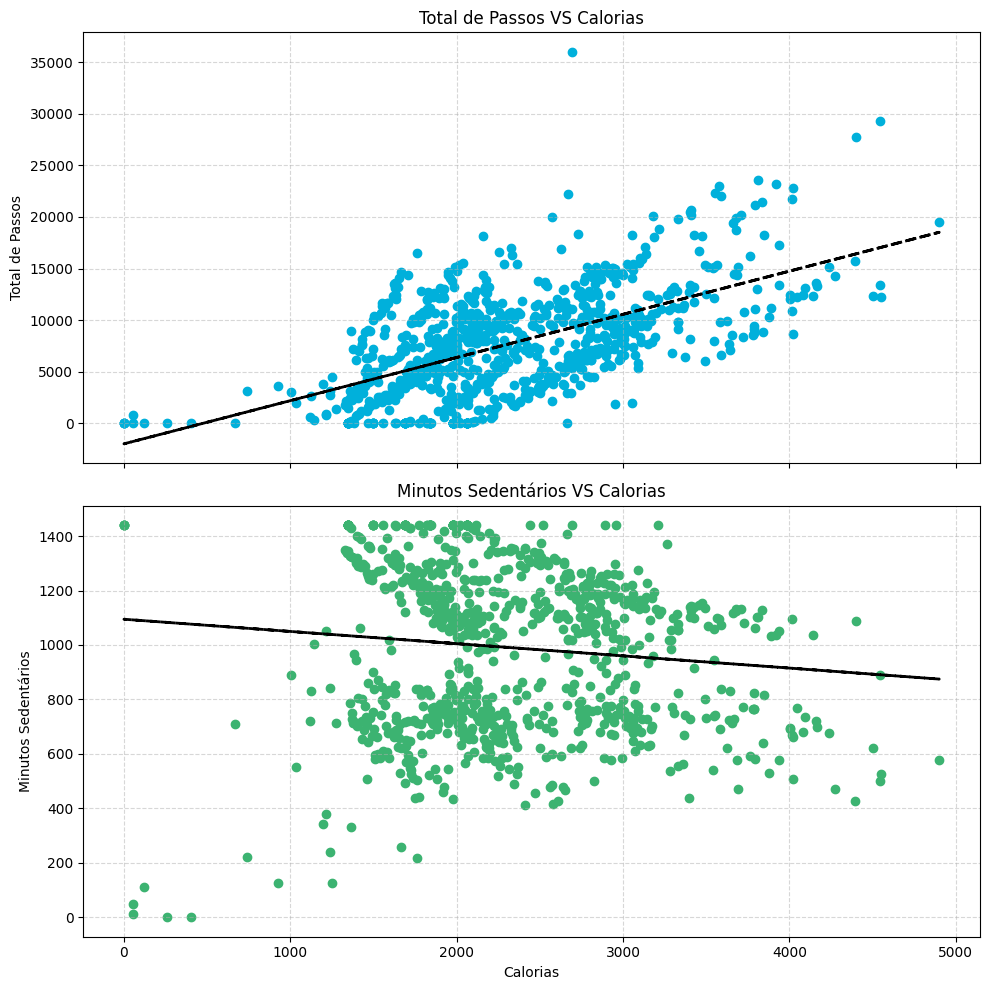

In [20]:
#Relação entre calorias e atividades com gráfico de dispersão
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)

# Gráfico 1: Calorias VS Total de Passos
ax0.scatter(x=daily_activity["calories"],
            y=daily_activity["total_steps"],
            color='#00b0db')
z = np.polyfit(daily_activity["calories"], daily_activity["total_steps"], 1)
p = np.poly1d(z)
ax0.plot(daily_activity["calories"], p(daily_activity["calories"]), color='black', linestyle='--', linewidth=2)
ax0.set(title="Total de Passos VS Calorias",
        ylabel="Total de Passos")
ax0.grid(True, linestyle='--', alpha=0.5)

# Gráfico 2: Calorias VS Minutos Sedentários
ax1.scatter(x=daily_activity["calories"],
            y=daily_activity["sedentary_minutes"],
            color='mediumseagreen')
z = np.polyfit(daily_activity["calories"], daily_activity["sedentary_minutes"], 1)
p = np.poly1d(z)
ax1.plot(daily_activity["calories"], p(daily_activity["calories"]), color='black', linestyle='--', linewidth=2)
ax1.set(title="Minutos Sedentários VS Calorias", xlabel="Calorias", ylabel="Minutos Sedentários")
ax1.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Os gráficos de dispersão acima mostram a relação entre os minutos de intensidade total, os minutos sedentários e o número de passos com as calorias queimadas.

Quanto **maior o tempo em atividade** muito intensa e maior o número de passos, mais calorias são queimadas. 
Por outro lado, os minutos em atividades moderadas, leves e o tempo sedentário apresentam uma correlação mais fraca com as calorias queimadas.


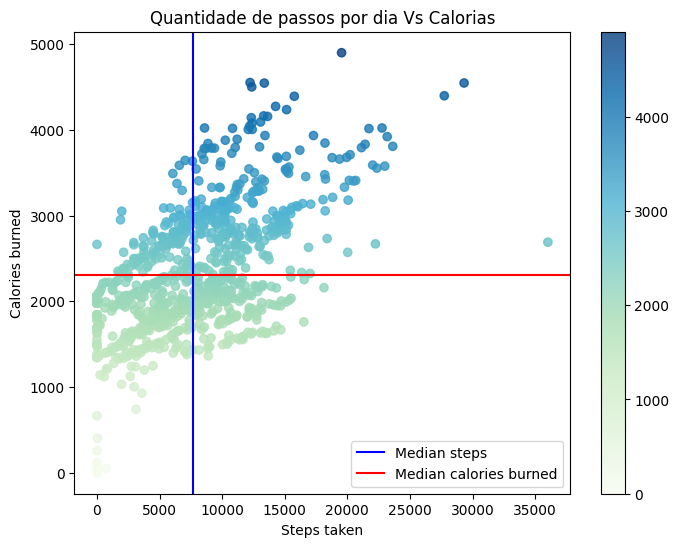

In [21]:
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(daily_activity.total_steps, daily_activity.calories, 
            alpha = 0.8, c = daily_activity.calories, 
            cmap = "GnBu")
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Quantidade de passos por dia Vs Calorias")
plt.legend()
plt.show()

A partir do gráfico de dispersão, pode-se identificar que:

- Há uma **correlação positiva** entre o número de passos e as calorias queimadas.
- Observa-se que a intensidade das calorias queimadas aumenta quando os usuários estão na faixa de mais de **0 a 15.000 passos**, com a taxa de queima de calorias diminuindo após os **15.000 passos**.

Além disso, podem ser identificados alguns **outliers**:

- **Zero passos**, com **zero a calorias mínimas queimadas**.
- Uma observação de mais de **35.000 passos**, com menos de **3.000 calorias queimadas**.

Esses outliers podem ser explicados pela **variação natural dos dados**, mudanças no comportamento do usuário ou **erros na coleta de dados**, como **cálculos imprecisos**, **contaminação de dados** ou **erro humano**.


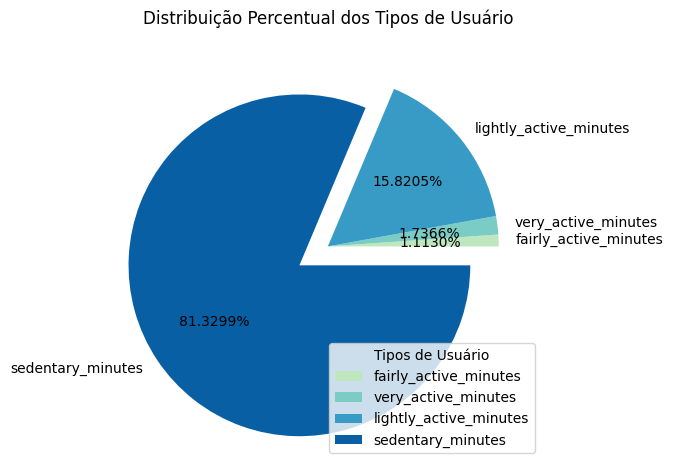

In [22]:
#Porcentagem entre Tipos de Usuário
FairlyActiveMinutes = daily_activity['fairly_active_minutes'].sum()
VeryActiveMinutes = daily_activity['very_active_minutes'].sum()
LightlyActiveMinutes = daily_activity['lightly_active_minutes'].sum()
SedentaryMinutes = daily_activity['sedentary_minutes'].sum()

minuts = [FairlyActiveMinutes, VeryActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
label = ['fairly_active_minutes', 'very_active_minutes', 'lightly_active_minutes', 'sedentary_minutes']
colors = plt.get_cmap("GnBu")(np.linspace(0.3, 0.9, len(minuts)))
plt.pie(minuts, labels=label, autopct='%1.4f%%', explode=[0, 0, 0, 0.2], colors=colors)
plt.legend(
    labels=label, 
    title="Tipos de Usuário", 
    loc='lower right',  
    fontsize=10  
)
plt.title('Distribuição Percentual dos Tipos de Usuário')
plt.tight_layout()
plt.show()


Pode-se afirmar que **81% dos usuários** utilizam o programa para calcular as calorias queimadas em **atividades diárias normais**.

#### Porcentagem de Atividade em Minutos

Como visto no gráfico de pizza:

- Os **minutos sedentários** ocupam a maior parte, com **81,3%**.
  
  Isso indica que os usuários estão usando o aplicativo FitBit para registrar **atividades diárias**, como deslocamentos diários, movimentos inativos (mover-se de um local para outro) ou tarefas cotidianas.

- O aplicativo é raramente utilizado para acompanhar **atividades físicas** (como corrida), conforme demonstrado pela **baixa porcentagem de atividade moderada (1,1%)** e **atividade muito ativa (1,7%)**.

Isso é bastante **desmotivador**, pois o aplicativo FitBit foi desenvolvido para **incentivar a prática de atividades físicas**.


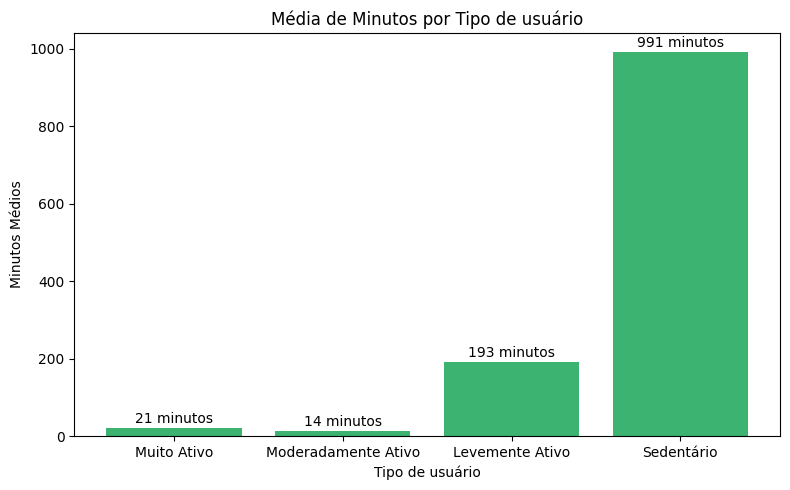

In [23]:
#Minutos por tipo de usuário
media_very_active = daily_activity['very_active_minutes'].mean()
media_fairly_active = daily_activity['fairly_active_minutes'].mean()
media_lightly_active = daily_activity['lightly_active_minutes'].mean()
media_sedentary = daily_activity['sedentary_minutes'].mean()

atividades = ['Muito Ativo', 'Moderadamente Ativo', 'Levemente Ativo', 'Sedentário']
medias = [media_very_active, media_fairly_active, media_lightly_active, media_sedentary]

plt.figure(figsize=(8,5))
bars = plt.bar(atividades, medias, color='mediumseagreen')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{bar.get_height():.0f} minutos', ha='center', va='bottom')

plt.title('Média de Minutos por Tipo de usuário')
plt.ylabel('Minutos Médios')
plt.xlabel('Tipo de usuário')
plt.ylim(0, max(medias) + 50)
plt.tight_layout()
plt.show() 

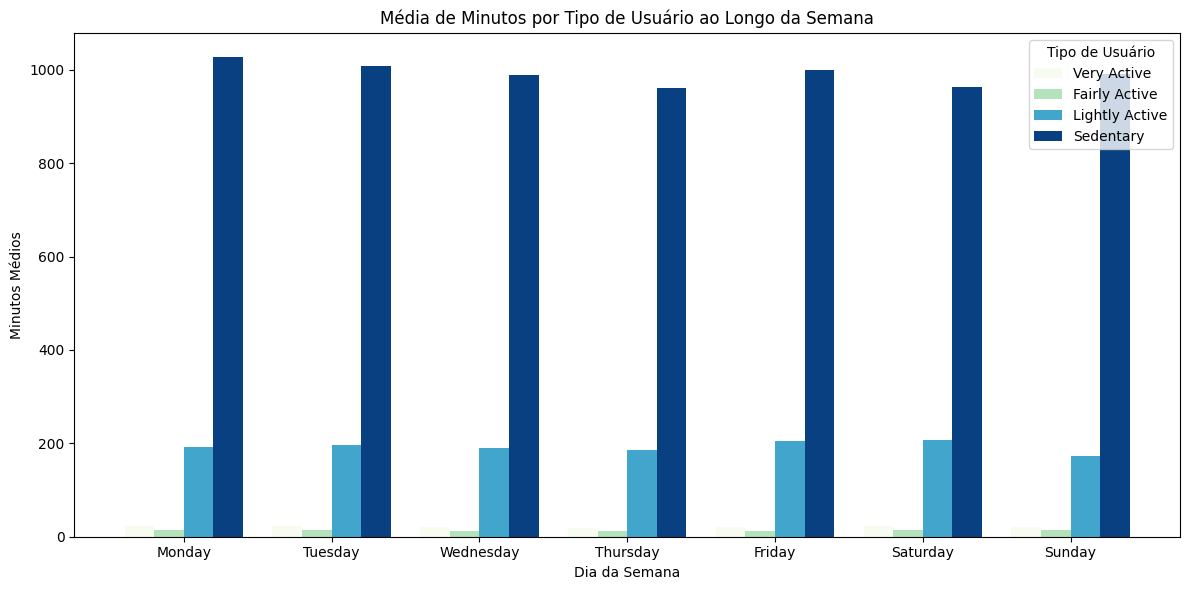

In [24]:
#Média de Minutos por Tipo de Usuário ao Longo da Semana
media_por_dia = daily_activity.groupby('day_name')[[
    'very_active_minutes',
    'fairly_active_minutes',
    'lightly_active_minutes',
    'sedentary_minutes'
]].mean()

dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
media_por_dia = media_por_dia.reindex(dias_ordenados)

plt.figure(figsize=(12, 6))

atividades = ['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes']
cores = cm.GnBu(np.linspace(0, 1, len(atividades)))
largura_barra = 0.2
x = range(len(media_por_dia))

for i, atividade in enumerate(atividades):
    plt.bar(
        [p + largura_barra * i for p in x],
        media_por_dia[atividade],
        width=largura_barra,
        label=atividade.replace('_minutes', '').replace('_', ' ').title(),
        color=cores[i]
    )

plt.xticks([p + largura_barra * 1.5 for p in x], dias_ordenados)
plt.ylabel('Minutos Médios')
plt.xlabel('Dia da Semana')
plt.title('Média de Minutos por Tipo de Usuário ao Longo da Semana')
plt.legend(title='Tipo de Usuário')
plt.tight_layout()
plt.show()  

Através das consultas realizadas, observa-se que os **minutos sedentários** são os mais altos. 

Essa constatação indica que a **Bellabeat** poderia aproveitar os **objetivos de atividade** para incentivar os usuários a atingirem metas diárias. Como os usuários já parecem ter metas pessoais de atividade diárias, a Bellabeat pode promover **metas de atividade mais altas**, especialmente para **atividades muito ativas** ou **moderadamente ativas**, com o objetivo de aumentar os minutos ativos diários.


    day_name  total_steps
0   Saturday      8152.98
1    Tuesday      8125.01
2     Monday      7780.87
3  Wednesday      7559.37
4     Friday      7448.23
5   Thursday      7405.84
6     Sunday      6933.23


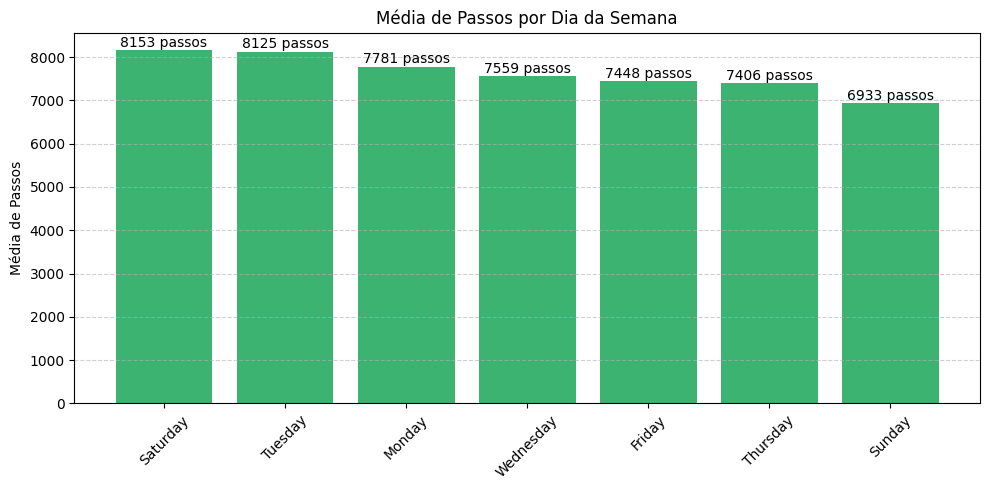

In [25]:
average_steps = daily_activity.groupby('day_name')['total_steps'].mean().round(2).sort_values(ascending=False)
average_steps_df = average_steps.reset_index()
print(average_steps_df)

plt.figure(figsize=(10, 5))
bars = plt.bar(average_steps_df['day_name'], average_steps_df['total_steps'], color='mediumseagreen')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{bar.get_height():.0f} passos', ha='center', va='bottom')
plt.ylabel("Média de Passos")
plt.title("Média de Passos por Dia da Semana")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Com esse resultado, o **sábado** apresentou a maior média de passos, seguido pelo meio da semana (**terça-feira** e **quarta-feira**). O **domingo** foi o dia com a menor quantidade de passos, seguido pela **quinta-feira**.

Isso indica que os usuários tendem a ser mais ativos no **sábado**, e menos ativos no **domingo** e **quinta-feira**. A Bellabeat poderia considerar o envio de notificações de incentivo à atividade física nesses dias menos ativos, estimulando os usuários a se moverem mais e atingirem suas metas de atividade.


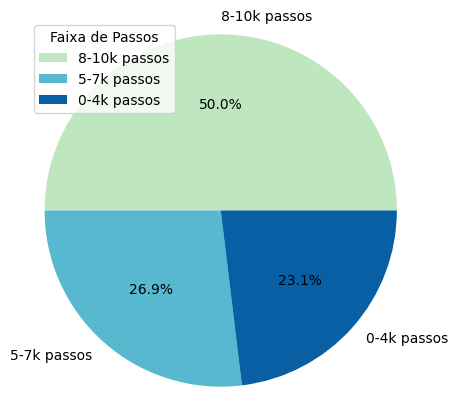

In [26]:
average_steps = daily_activity.groupby('id')['total_steps'].mean().round(2)
bins = [0, 4000, 7000, 10000]
labels = ['0-4k passos', '5-7k passos', '8-10k passos']  # Faixas de passos ajustadas
step_range = pd.cut(average_steps, bins=bins, labels=labels, right=True)
step_range_counts = step_range.value_counts()
colors = plt.get_cmap("GnBu")(np.linspace(0.3, 0.9, len(step_range_counts)))
plt.figure(figsize=(5, 5))
plt.pie(step_range_counts, labels=step_range_counts.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal') 
plt.legend(step_range_counts.index, title="Faixa de Passos", loc="upper left")
plt.show()



A maioria dos usuários **não atingiu a recomendação de 10.000 passos por dia**, conforme mencionado no estudo da Universidade de Kansas "10 mil passos pode realmente ser a "pílula mágica" que todos procuram" ["10,000 steps might really be the ‘magic pill’ everyone is seeking"](https://www.kumc.edu/about/news/news-archive/jama-study-ten-thousand-steps.html).


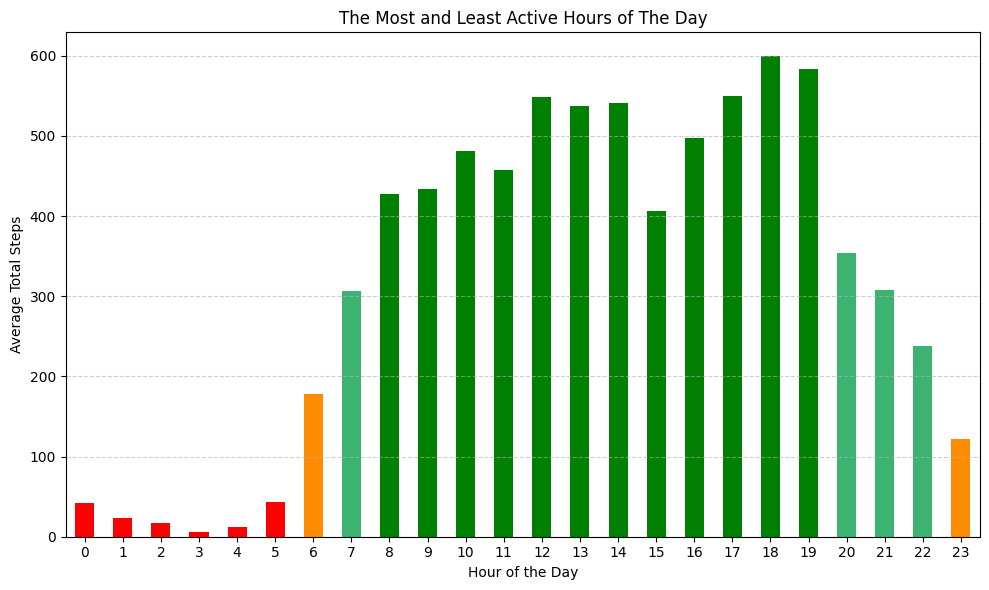

In [27]:
step_by_hour = hourly_steps.groupby('time')['step_total'].mean()
colors = ['red' if val < 100 else 'darkorange' if val <= 200 else 'mediumseagreen' if val <= 400 else 'green' for val in step_by_hour]
fig, axs = plt.subplots(figsize=(10, 6))
step_by_hour.plot(kind='bar', color=colors, rot=0, ax=axs, title='The Most and Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Total Steps")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Observa-se que o período de maior atividade dos usuários ocorre entre **8h** e **19h**. As faixas horárias de menor atividade estão concentradas entre **20h** e **22h**. Esses períodos de inatividade sugerem que seriam **oportunidades ideais** para a implementação de **anúncios direcionados**, uma vez que a atenção dos usuários pode ser mais receptiva nesse intervalo.




---

# **Etapa 5 - Act**

Com base na análise dos dados do **FitBit Fitness Tracker**, a **Bellabeat** pode implementar as seguintes estratégias para melhorar a experiência do usuário e aumentar o engajamento com seus produtos:

#### **Campanhas de Marketing Personalizadas**
- **Campanha de Motivação e Educação sobre Saúde**: Criar campanhas educativas e motivacionais focadas em usuários sedentários, com dicas diárias sobre saúde e bem-estar e incentivos para alcançar metas diárias de passos. Com base nos dados, 50% dos usuários não atingiram a meta recomendada de 8.000 a 10.000 passos, o que representa uma grande oportunidade para engajar esse público.
- **Desenvolvimento de Hábitos Saudáveis**: Focar em aumentar o número de passos diários (meta de 8.000 a 10.000 passos), oferecendo funcionalidades para acompanhamento e estabelecimento de novas metas.

#### **Funcionalidades para Engajamento e Melhora no Bem-Estar**
- **Lembretes para Atividade Física**: Programar lembretes diários para usuários em longos períodos de inatividade, sugerindo pausas para caminhar ou alongar. A análise mostrou que 18,2% dos usuários têm um uso "baixo" ou "moderado" do dispositivo, o que pode ser melhorado com lembretes durante o dia, como "levante-se e movimente-se" ou "complete sua meta de passos".
  
#### **Aprimorar Funcionalidades do Produto**
- **Recomendações Personalizadas de Alimentação**: Integrar sugestões alimentares com base nas metas de saúde de cada usuário, como receitas saudáveis ou com foco em nutrição para perda de peso. Isso pode ser uma maneira de engajar os usuários além da atividade física e do sono, promovendo um estilo de vida mais equilibrado.
- **Aprimorar Interface do App**: Melhorar o acompanhamento do progresso de passos, calorias queimadas e atividades, proporcionando uma visualização clara do progresso diário e de longo prazo, o que pode incentivar a adesão contínua.

#### **Melhorias para Incentivar o Uso Regular**
- **Recompensas por Consistência**: Criar um sistema de recompensas (badges ou pontos) para usuários que atingem metas, incentivando o uso contínuo do dispositivo. A implementação de um sistema de recompensas pode aumentar a motivação e tornar a experiência mais envolvente, especialmente para os usuários ativos.
- **Notificações para Horários de Atividade**: A análise dos dados mostrou que os usuários tendem a alcançar o maior número de passos entre 17h e 19h. Utilizar essa informação para enviar notificações personalizadas, como "inicie sua caminhada" ou "comece seu treino", pode ajudar a aumentar a atividade física nos horários de pico.

#### **Promoção de Funcionalidades com Baixa Adoção**
- **Estimular Atividades Intensivas**: Criar campanhas para incentivar atividades mais intensas, com desafios e premiações para quem completar as metas. Isso pode ajudar a promover funcionalidades que não estão sendo amplamente adotadas, incentivando os usuários a explorar novos aspectos do dispositivo.

#### **Conclusão**
A **Bellabeat** pode aumentar o engajamento e a adoção de seus dispositivos com foco em campanhas motivacionais, personalização do app e funcionalidades que incentivem hábitos saudáveis. A implementação dessas estratégias pode fortalecer a marca e promover um impacto positivo no bem-estar dos usuários, com a adaptação contínua das funcionalidades para melhor atender às necessidades e rotinas do público-alvo.
